In [31]:
# dp practice (haven't used Python for a while since working on Julia)
cache = {1:1, 2:1}
def fib(n):
    if n in cache:
        return cache[n]
    current = fib(n-1) + fib(n-2)
    cache[n] = current
    return current

num = 100
print("fib(",num,"):",fib(num))
# print(cache)

# Ahh, it's as great as I remember.
    

fib( 100 ): 354224848179261915075


In [32]:
# Get pandas for dealing with xlsx
import pandas as pd

In [292]:
# Old numpy
import numpy as np
# Stats
import statistics as st
import statsmodels.api as sm
# Plotting
import matplotlib.pyplot as plt
import math

In [46]:
# set path
path = "/Users/chaseabram/UChiGit/Skwad/Empirical Analysis III/Problem Sets/Heckman Pset 1/PS1_Q5_Data.xlsx"
# read file
xls = pd.ExcelFile(path)

In [354]:
# Get number of sheets (72)
num_sheets = len(xls.sheet_names)
# initialize data frame
dfs = [0]*num_sheets

# results data frame
column_names = ['sample', 'mu_1', 'mu_2', 'sigma_1', 'sigma_2', 'sigma_e', 'rho', 'beta_0', 'beta_1', 'beta_2',
               't > 1.964', ]
results = pd.DataFrame(columns = column_names)

# read each sheet into data frame such that dfs[sheet][variable][observation]
for i in range(0,num_sheets):
    # Add to data frame
    sheet_name = 'DataSet' + str(i)
    dfs[i] = pd.read_excel(xls, sheet_name)
    
    # read in data
    X = np.zeros((3, len(dfs[i])))
    X[0] = [1]*len(dfs[i])
    X[1] = dfs[i]['X1']
    X[2] = dfs[i]['X2']
    Y = dfs[i]['Y']
    
    # means
    mu_1 = np.mean(X[1])
    mu_2 = np.mean(X[2])
    
    # var-cov
    Sigma = np.cov(X)
    sigma_1 = math.sqrt(Sigma[1,1])
    sigma_2 = math.sqrt(Sigma[2,2])
                       
    # rho
    rho = Sigma[2,1]/(Sigma[1,1]*Sigma[2,2])
    
    # run ols with X1 and X2
    model = sm.OLS(Y,X.T)
    result = model.fit()
    betas = result.params
    
    # est var of residuals
    sigma_e = np.cov(result.resid)
    
    # t stat
    tstat = result.tvalues[2]
    
    # t default is reject beta_2 = 0
    t_test = 1
    
    # t test for beta 2
    if tstat < 1.964:
        # t test cannot reject null of beta_2 = 0
        t_test = 0
#         print("fail")
        
        # OVB regression replaces beta0 and beta1
        model = sm.OLS(Y,X[0:2].T)
        result = model.fit()
        betas[0:2] = result.params     
    
    # create new data frame entry with variables
    new_df = pd.DataFrame([i, mu_1, mu_2, sigma_1, sigma_2, sigma_e,
                          rho, betas[0], betas[1], betas[2], t_test]).T
    new_df.columns = column_names
    
    # add to results data frame
    results = pd.concat([results, new_df])

results
# min(results['beta_1'])

,sample,mu_1,mu_2,sigma_1,sigma_2,sigma_e,rho,beta_0,beta_1,beta_2,t > 1.964
0,0,0.0963889,-0.163139,1.08639,0.997699,0.758525304741982,-0.126427,0.516536,0.911316,0.0342026,0
0,1,10.0195,0.0412399,1.00918,1.10061,0.7629126035846635,0.0386315,0.978429,0.95717,0.176652,1
0,2,-0.00190517,-0.100593,0.323465,0.962584,0.8489582699865299,-0.150394,0.503375,1.58944,-0.0431523,0
0,3,10.0215,-0.036723,0.301242,1.00266,0.8094551776666631,-0.120528,0.788175,0.971877,0.0995011,0
0,4,-0.570569,-0.0701752,3.07711,1.04337,0.838731485857183,0.0377964,0.545441,0.944152,0.0897705,0
...,...,...,...,...,...,...,...,...,...,...,...
0,67,10.1183,-0.0039692,1.05855,0.931745,87.16308011125388,-0.48607,3.01744,0.683648,-2.18669,0
0,68,-0.0558208,0.14784,0.311087,0.934674,97.43879713080821,-1.84092,-0.1136,-1.72048,0.13097,0
0,69,10.0114,-0.136224,0.325073,1.00784,90.06906270578304,-1.4284,-20.6846,3.07928,1.43544,0
0,70,-0.309387,0.212392,2.86854,0.996305,102.84623753100946,-0.19409,-0.461638,1.14098,0.744893,0


mean: 1.0624462214809471
var: 0.9020957106333761


Text(4, 0.8, 'var = 0.9')

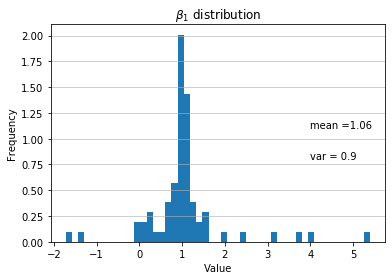

In [350]:
# Histogram to see distribution of beta_1
# plt.hist(np.histogram(results['beta_1']))
plt.hist(results['beta_1'], bins='auto', density = True)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(r'$\beta_1$ distribution')
print('mean:',np.mean(results['beta_1']))
betas_mean = np.mean(results['beta_1'])
print('var:',np.var(results['beta_1']))
betas_var = np.var(results['beta_1'])
plt.text(4, 1.1, r'mean = ' + str(round(betas_mean,2)))
plt.text(4, 0.8, r'var = ' + str(round(betas_var,2)))


In [351]:
# Bias analysis
